# Preparing benchmark datasets

In [1]:
# Benchmark datasets
# Source: https://imbalanced-learn.org/stable/datasets/index.html

datasets_names = [      # ID    Repository & Target             Ratio     #S      #F
    "ecoli",            # 1     UCI, target: imU                8.6:1     336     7
    "optical_digits",   # 2     UCI, target: 8                  9.1:1     5,620   64
    "satimage",         # 3     UCI, target: 4                  9.3:1     6,435   36
    "pen_digits",       # 4     UCI, target: 5                  9.4:1     10,992  16
    "abalone",          # 5     UCI, target: 7                  9.7:1     4,177   10
    # "sick_euthyroid",   # 6     UCI, target: sick euthyroid     9.8:1     3,163   42
    # "spectrometer",     # 7     UCI, target: >=44               11:1      531     93
    # "car_eval_34",      # 8     UCI, target: good, v good       12:1      1,728   21
    # "isolet",           # 9     UCI, target: A, B               12:1      7,797   617
    # "us_crime",         # 10    UCI, target: >POOL_SIZE5              12:1      1,994   100
    # "yeast_ml8",        # 11    LIBSVM, target: 8               13:1      2,417   103
    # "scene",            # 12    LIBSVM, target: >one label      13:1      2,407   294
    # "libras_move",      # 13    UCI, target: 1                  14:1      360     90
    # "thyroid_sick",     # 14    UCI, target: sick               15:1      3,772   52
    # "coil_2000",        # 15    KDD, CoIL, target: minority     16:1      9,822   85
    # "arrhythmia",       # 16    UCI, target: 06                 17:1      452     278
    # "solar_flare_m0",   # 17    UCI, target: M->0               19:1      1,389   32
    # "oil",              # 18    UCI, target: minority           22:1      937     49
    # "car_eval_4",       # 19    UCI, target: vgood              26:1      1,728   21
    # "wine_quality",     # 20    UCI, wine, target: <=4          26:1      4,898   11
    # "letter_img",       # 21    UCI, target: Z                  26:1      20,000  16
    # "yeast_me2",        # 22    UCI, target: ME2                28:1      1,484   8
    # "webpage",          # 23    LIBSVM, w7a, target: minority   33:1      34,780  300
    # "ozone_level",      # 24    UCI, ozone, data                34:1      2,536   72
    # "mammography",      # 25    UCI, target: minority           42:1      11,183  6
    # "protein_homo",     # 26    KDD CUP 2004, minority          11:1      145,751 74
    # "abalone_19"        # 27    UCI, target: 19                 130:1     4,177   10
]               

#   "htru2"             # fin   UCI, target: minority           10:1      17,898  8


In [4]:
# Check if number of datasets is correct
assert len(datasets_names) == 27

In [27]:
# Download, convert and save datasets
import sklearn
import pandas as pd
from imblearn.datasets import fetch_datasets

import os
cwd = os.getcwd()
fp_benchmark = os.path.join(cwd, "../../data/benchmark")

def save_benchmark_dataset(bunch: sklearn.utils.Bunch) -> None:
    df = pd.DataFrame(bunch['data'])
    df['target'] = bunch['target']
    df.name = bunch['DESCR']

    df.to_csv(os.path.join(fp_benchmark, f'{df.name}.csv'))

for dataset_name in datasets_names:
    bunch = fetch_datasets()[dataset_name]
    save_benchmark_dataset(bunch)

In [2]:
# Load datasets
import pandas as pd

import os
cwd = os.getcwd()
fp_benchmark = os.path.join(cwd, "../../data/benchmark")

def load_benchmark_dataset(name: str) -> pd.DataFrame:
    df = pd.read_csv(os.path.join(fp_benchmark, f'{name}.csv'), index_col=0)
    df.name = name
    return df

datasets = {}
for dataset_name in datasets_names:
    df = load_benchmark_dataset(dataset_name)
    datasets[dataset_name] = df

# Analysing benchmark datasets

Dataset pen_digits:
----------
Describe:
                  0             1             2             3             4  \
count  10992.000000  10992.000000  10992.000000  10992.000000  10992.000000   
mean      38.814320     85.120269     40.605622     83.774199     49.770378   
std       34.257783     16.218571     26.342984     19.163646     34.100515   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000     76.000000     20.000000     72.000000     18.000000   
50%       32.000000     89.000000     40.000000     91.000000     53.000000   
75%       65.000000    100.000000     58.000000    100.000000     78.000000   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

                  5             6             7             8             9  \
count  10992.000000  10992.000000  10992.000000  10992.000000  10992.000000   
mean      65.573144     51.220251     44.498999     56.868541     33.695961   
std       

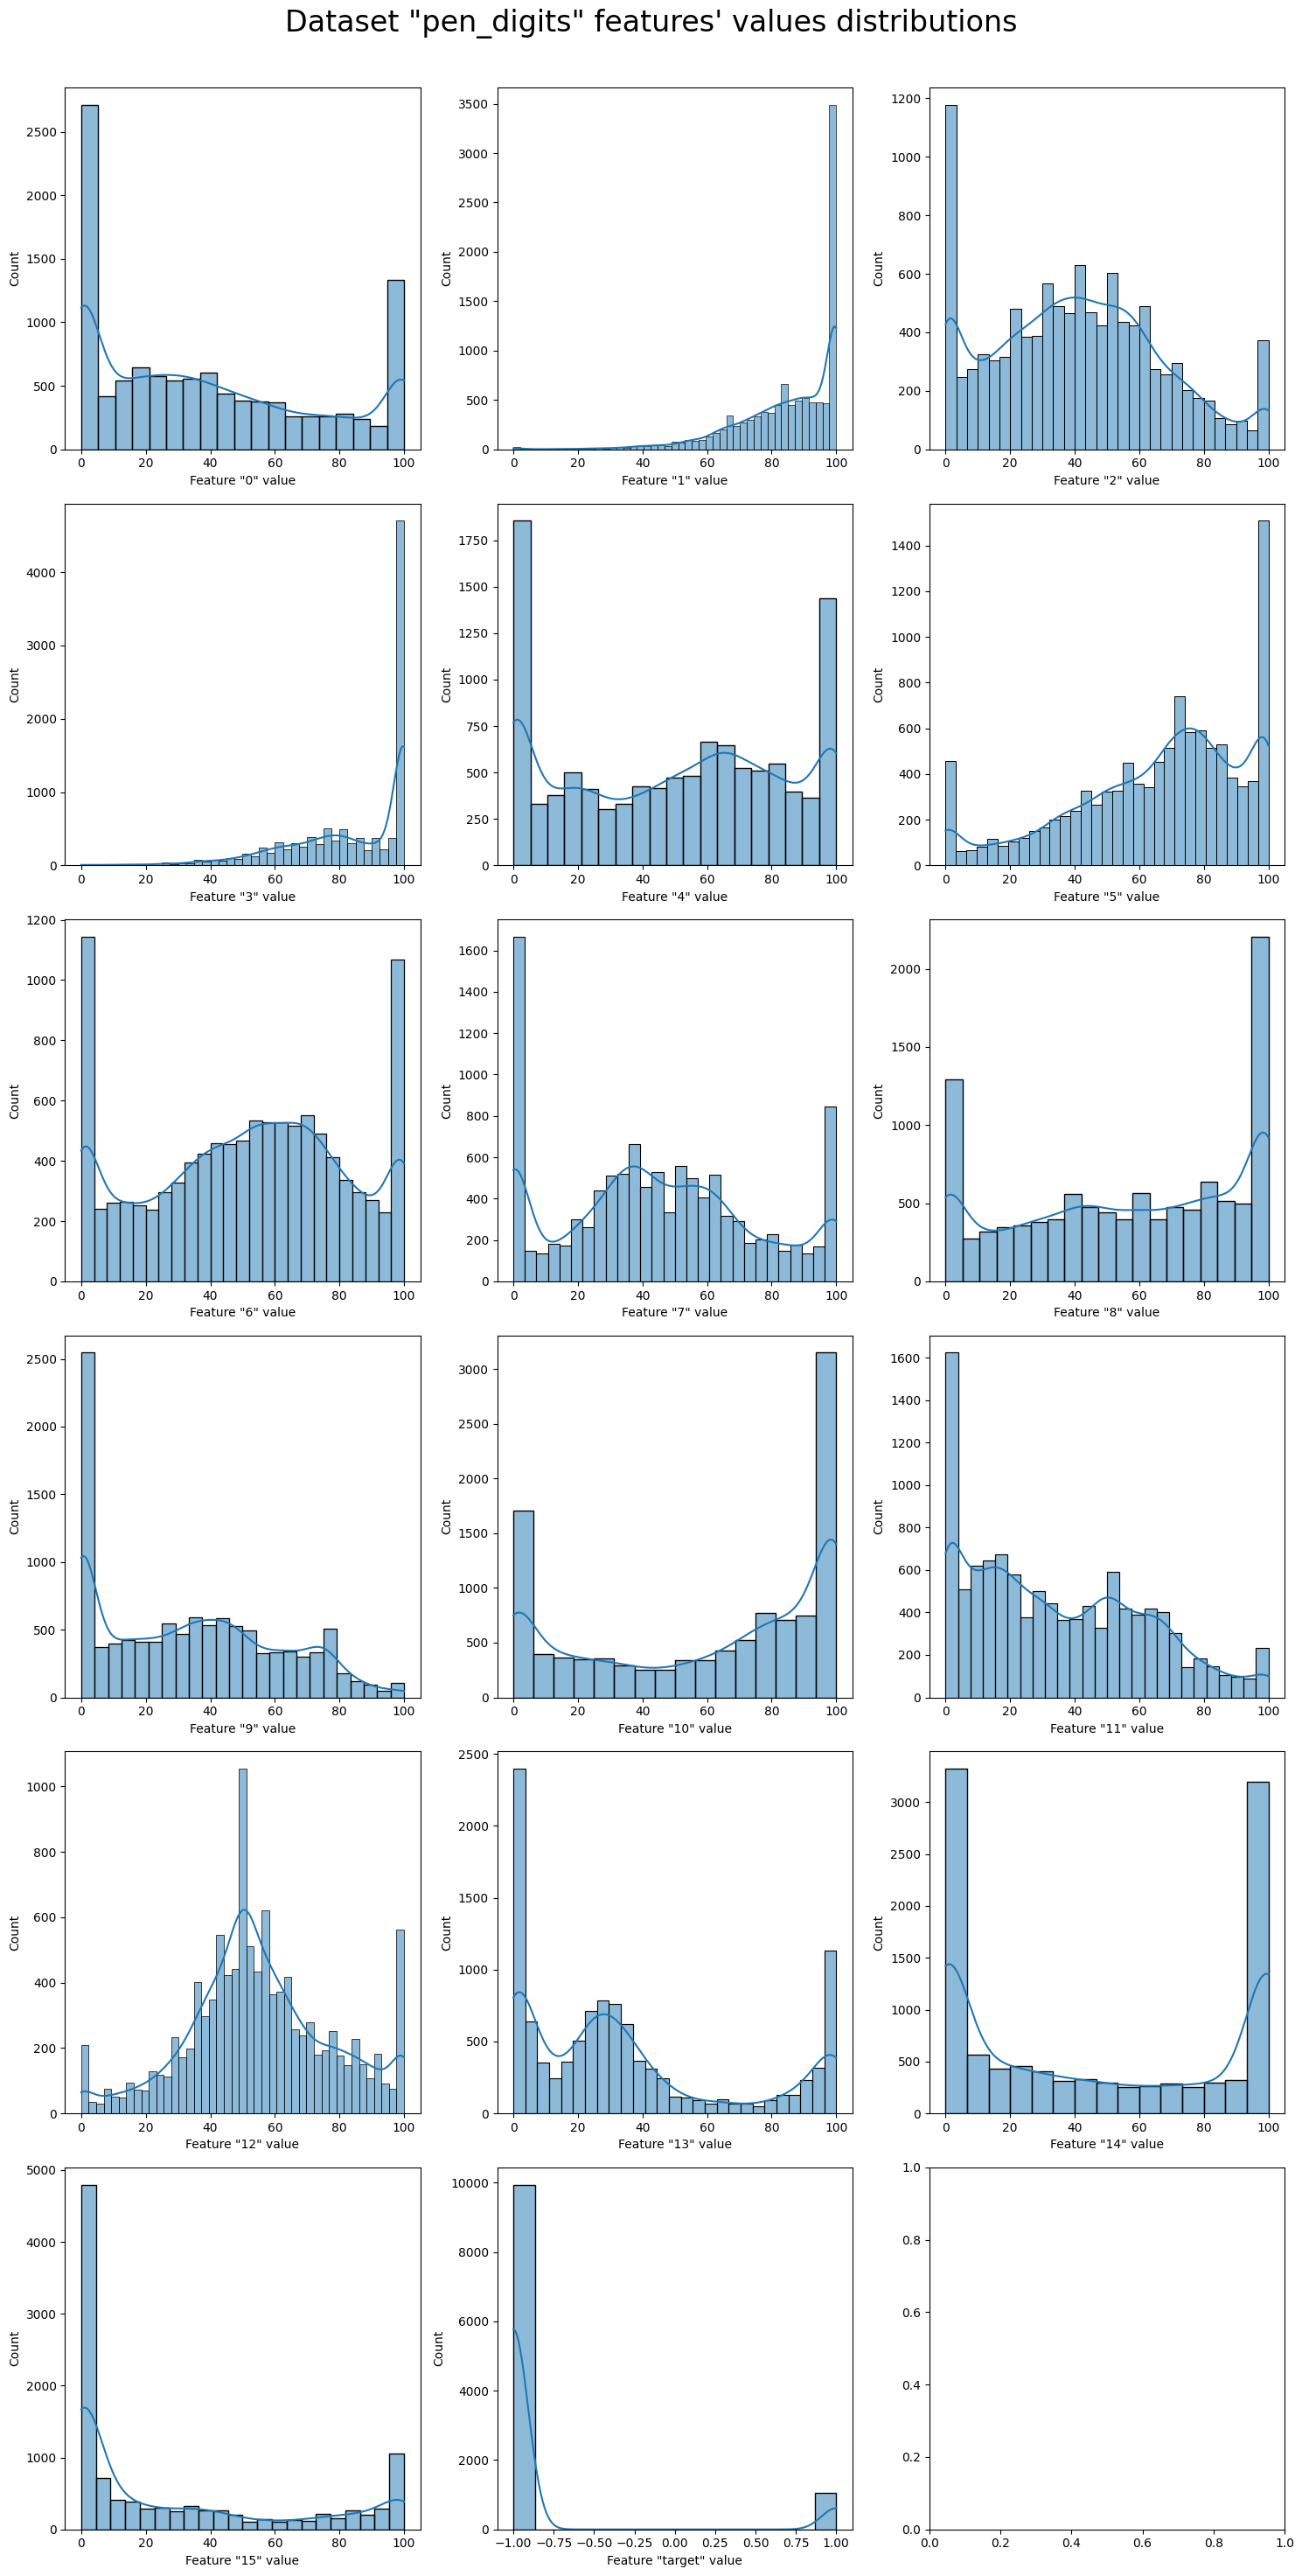

In [6]:
# Analyse dataframe in the context of features' values distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def analyse_dataset(df: pd.DataFrame) -> None:
    print(f'Dataset {df.name}:\n'+10*'-')
    print("Describe:")
    print(df.describe())
    print("Classes:")
    targets = df.target.value_counts()
    targets.sort_values(inplace=True)
    print(targets)
    print(f"IR: {targets.iloc[1]/targets.iloc[0]:.2f}")

    nrows = math.ceil(len(df.columns)/3)
    fig, axes = plt.subplots(nrows = nrows, ncols = 3)
    axes = axes.flatten()
    fig.set_size_inches(15, nrows*5)
    fig.suptitle(f'Dataset \"{df.name}\" features\' values distributions', fontsize=24)

    for ax, col in zip(axes, df.columns):
        sns.histplot(df[col], ax = ax,  kde=True)
        ax.set(xlabel=f'Feature \"{col}\" value')
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

analyse_dataset(datasets['pen_digits'])

from sklearn.decomposition import PCA
RANDOM_STATE_SEED = 13

# TODO: PCA analysis
def pca_dataset(df: pd.DataFrame) -> None:
    # Define our PCA transformer and fit it onto our raw dataset.
    pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
    transformed_iris = pca.fit_transform(X=X_raw)

# Preprocessing benchmark dataset

In [3]:
# Standardize dataframe
import pandas as pd
from sklearn.preprocessing import StandardScaler

def split_dataset_xy(dataset: pd.DataFrame, target_name="target") -> list[pd.DataFrame]:
    X = dataset.loc[:, dataset.columns != "target"]#.to_numpy()
    y = dataset["target"]#.values
    return X, y

def merge_dataset_xy(X: pd.DataFrame, y: pd.DataFrame) -> pd.DataFrame:
    X["target"] = y
    return X

def standardize(dataset: pd.DataFrame) -> list[pd.DataFrame]:
    X, y = split_dataset_xy(dataset)
    scaler = StandardScaler().fit(X)
    X_standardized = scaler.transform(X)
    return merge_dataset_xy(pd.DataFrame(X_standardized), y)

#standardize(datasets['pen_digits'])

# Active Learning algoritms

In [4]:
# Importing sklearn classificators
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
# Classificators configurations
def get_classificator(m):
    models_switcher={
        "GNB": { # ComplementNB and MultinomialNB require non-negative Xes
            "model": GaussianNB,
            "params": [{}]
        }, 
        "BNB": {
            "model": BernoulliNB,
            "params": [{}]
        },
        "KNN": {
            "model": KNeighborsClassifier,
            "params": [{}]
        },
        "LR": {
            "model": LogisticRegression,
            "params": [{}]
        },
        "SVC": {
            "model": SVC,
            "params": [{'C': 1.0, 'kernel': 'rbf', 'class_weight': None, 'max_iter': 1000, 'random_state': None, 'probability': True, 'tol': 0.0001, 'verbose': 0}]
        },
        "DTC": {
            "model": DecisionTreeClassifier,
            "params": [{}]
        },
        "RFC": {
            "model": RandomForestClassifier,
            "params": [{}]
        },
        "GBC": {
            "model": GradientBoostingClassifier,
            "params": [{}]
        }
    }
    return models_switcher.get(m, "Invalid model")
    
classificator_names=[
    # "GNB",
    # "BNB",
    "KNN",
    # "LR", 
    # "SVC",
    # "DTC", 
    # "RFC", 
    # "GBC"
]

In [6]:
# Import active learning classes and methods
import os
import sys
module_path = os.path.abspath(os.path.join('../active_learning/modAL/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from modAL.models import ActiveLearner, Committee
from modAL.uncertainty import uncertainty_sampling, margin_sampling, entropy_sampling
from modAL.disagreement import vote_entropy_sampling, consensus_entropy_sampling, max_disagreement_sampling, max_std_sampling

In [7]:
# Active learning configurations

POOL_SIZE = 0.6
MAX_ITERATIONS = 10
N_MODELS = 5

def get_active_learning_method(m):
    active_learning_methods_switcher={
        "uncertainty_sampling": {
            "params": [{'query_strategy': uncertainty_sampling, 'pool_size': POOL_SIZE, 'max_iterations': MAX_ITERATIONS},
                       {'query_strategy': margin_sampling, 'pool_size': POOL_SIZE, 'max_iterations': MAX_ITERATIONS},
                       {'query_strategy': entropy_sampling, 'pool_size': POOL_SIZE, 'max_iterations': MAX_ITERATIONS}]
        },
        "query_by_committee":{
            "params":[{'n_models': N_MODELS, 'disagreement_measure': vote_entropy_sampling, 'pool_size': POOL_SIZE, 'max_iterations': MAX_ITERATIONS},
                      {'n_models': N_MODELS, 'disagreement_measure': consensus_entropy_sampling, 'pool_size': POOL_SIZE, 'max_iterations': MAX_ITERATIONS},
                      {'n_models': N_MODELS, 'disagreement_measure': max_disagreement_sampling, 'pool_size': POOL_SIZE, 'max_iterations': MAX_ITERATIONS}]

        }
    }
    return active_learning_methods_switcher.get(m, "Invalid method")


active_learning_methods=[
    "uncertainty_sampling",
    "query_by_committee"
]

In [8]:
# Classification score
from sklearn.metrics import auc, precision_recall_curve, roc_curve, precision_score, recall_score
from imblearn.metrics import geometric_mean_score

def method_eval(y_test, y_pred):

    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred)
    auc_roc_curve = auc(fpr, tpr)

    precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_pred)
    auc_pr_curve = auc(recalls, precisions)

    # TODO: Check if there are any positive samples in y_test (ensure it!) - it is ensured by stratified kfold (?)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)

    if precision+recall != 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0

    g_mean = geometric_mean_score(y_test, y_pred)

    metrics = {"precision": precision,
               "recall": recall,
               "f1_score": f1_score,
               "auc_pr_curve": auc_pr_curve,
               "auc_roc_curve": auc_roc_curve,
               "g_mean": g_mean}

    return metrics

In [9]:
# Uncertainty sampling
import numpy as np
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def uncertainty_sampling_al(**kwargs):
    results = {"pooled_training":[]}
    
    y_train_init = kwargs["y_train_init"]
    # initializing the learner
    learner = ActiveLearner(
        estimator=kwargs["Clf"](**kwargs["clf_params"]),
        X_training=kwargs["X_train_init"].to_numpy(), y_training=y_train_init.values,
        query_strategy = kwargs["alm_params"]["query_strategy"]
    )

    X_pool = kwargs["X_pool"].to_numpy()
    y_pool = kwargs["y_pool"].values
    X_test = kwargs["X_test"].to_numpy()
    y_test = kwargs["y_test"].values

    classes_distribution = y_train_init.value_counts()
    results["train_init"] = {"classes": classes_distribution.index.tolist(),
                             "counts": classes_distribution.values}

    y_pred = learner.predict(X_test)
    metrics = method_eval(y_test, y_pred)
    results["pooled_training"].append(metrics)

    for index in range(kwargs["alm_params"]["max_iterations"]):
        query_index, query_instance = learner.query(X_pool)

        # Teach our ActiveLearner model the record it has requested.
        X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
        learner.teach(X=X, y=y)

        # Remove the queried instance from the unlabeled pool.
        X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

        y_pred = learner.predict(X_test)
        metrics = method_eval(y_test, y_pred)
        results["pooled_training"].append(metrics)
        
    return results



In [10]:
# QueryByCommittee
import numpy as np
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def query_by_committee_al(**kwargs):
    n_members = kwargs["alm_params"]["n_models"]
    learners = []
    results = {"pooled_training":[]}

    y_train_init = kwargs["y_train_init"]
    for _ in range(n_members):
        learner = ActiveLearner(
                estimator=kwargs["Clf"](**kwargs["clf_params"]),
                X_training=kwargs["X_train_init"].to_numpy(), y_training=y_train_init.values
            )
        learners.append(learner)

    committee = Committee(
        learner_list=learners,
        query_strategy = kwargs["alm_params"]["disagreement_measure"]
    )

    X_pool = kwargs["X_pool"].to_numpy()
    y_pool = kwargs["y_pool"].values
    X_test = kwargs["X_test"].to_numpy()
    y_test = kwargs["y_test"].values

    classes_distribution = y_train_init.value_counts()
    results["train_init"] = {"classes": classes_distribution.index.tolist(),
                             "counts": classes_distribution.values}

    y_pred = committee.predict(X_test)
    metrics = method_eval(y_test, y_pred)
    results["pooled_training"].append(metrics)

    for index in range(kwargs["alm_params"]["max_iterations"]):
        query_idx, query_instance = committee.query(X_pool)

        # Teach our Committee model the record it has requested.
        X, y = X_pool[query_idx].reshape(1, -1), y_pool[query_idx].reshape(1, )
        committee.teach(X=X, y=y)

        # Remove the queried instance from the unlabeled pool.
        X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx)

        y_pred = committee.predict(X_test)
        metrics = method_eval(y_test, y_pred)
        results["pooled_training"].append(metrics)

    return results

    # # for learner in committee:
    # #     # ...do something with the learner...
    # samp_idx = np.random.choice(len(X_pool))
    # print(committee.vote(X_pool[samp_idx].reshape(1,-1)))
    # print(committee.vote_proba(X_pool[samp_idx].reshape(1,-1)))

    # # To get the predictions and class probabilities of the Committee itself, you shall use the .predict(X) and .predict_proba() methods

In [11]:
# Classification methods switcher
def learn_active(**kwargs) -> list[int]:
    if kwargs["method_name"] == 'uncertainty_sampling':
        al_results = uncertainty_sampling_al(**kwargs)
    elif kwargs["method_name"] == 'query_by_committee':
        al_results = query_by_committee_al(**kwargs)

    return al_results

In [12]:
# Main loop
from sklearn.model_selection import train_test_split, StratifiedKFold
from enum import Enum

RANDOM_STATE_SEED = 13

class DebugLevel(Enum):
    BENCHMARK = 0
    EACH_DATASET = 1
    ACTIVE_LEARNING = 2

def test_al_methods(debug_level = 0):
    results = []
    # Classificator models
    for classificator_name in classificator_names:
        clf_info = get_classificator(classificator_name)
        Clf = clf_info.get("model")
        clf_params_arr = clf_info.get("params")

        # Classificator model parameters
        for clf_params in clf_params_arr:
            
            # Active learning methods
            for method_name in active_learning_methods:
                alm_info = get_active_learning_method(method_name)
                alm_params_arr = alm_info.get("params")

                # Active learning method parameters
                for alm_params in alm_params_arr:

                    results.append({"classificator": str(Clf.__name__),
                                    "classificator_params": clf_params,
                                    "al_method": str(method_name),
                                    "al_method_params": alm_params,
                                    "datasets_results": []
                                    })

                    all_datasets_precision_arr = []
                    all_datasets_recall_arr = []
                    all_datasets_f1_score_arr = []
                    all_datasets_auc_pr_curve_arr = [] 
                    all_datasets_auc_roc_curve_arr = []
                    all_datasets_g_mean = []

                    # Datasets
                    for dataset_name, dataset in datasets.items():

                        # Standardizing
                        dataset = standardize(dataset)

                        # Spliting
                        X, y = split_dataset_xy(dataset)
                        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE_SEED)
                    
                        fold_results_arr = []
                        al_results_arr = []

                        # TODO: Hypertune models

                        # KFold
                        skf = StratifiedKFold(n_splits=5, random_state=RANDOM_STATE_SEED, shuffle=True)
                        for kf_train_indices, kf_test_indices in skf.split(X_train, y_train):

                            # Kfold train and test
                            X_train_kf, X_test_kf, y_train_kf, y_test_kf = X_train.iloc[kf_train_indices], \
                            X_train.iloc[kf_test_indices], y_train.iloc[kf_train_indices], y_train.iloc[kf_test_indices]
                            
                            # Kfold pool form train
                            X_train_init, X_pool, y_train_init, y_pool = train_test_split(X_train_kf, y_train_kf, \
                                                                            test_size=alm_params.get("pool_size"), stratify=y_train_kf, random_state=RANDOM_STATE_SEED)
                            
                            al_results = \
                                learn_active(Clf=Clf, clf_params=clf_params, method_name=method_name, alm_params=alm_params, X_train_init=X_train_init, X_pool=X_pool, \
                                X_test=X_test_kf, y_train_init=y_train_init, y_pool=y_pool, y_test=y_test_kf)
                            
                            fold_results_arr.append(al_results["pooled_training"][-1])
                            al_results_arr.append(al_results)

                        print(50*"-"+"\n",\
                            f"Classificator: {results[-1]['classificator']}\n",\
                            f"Classificator parameters: {results[-1]['classificator_params']}\n",\
                            f"Active learning method: {results[-1]['al_method']}\n",\
                            f"Active leraning parameters: {results[-1]['al_method_params']}\n",\
                            f"Dataset: {dataset_name}\n",\
                            50*"-"+"\n", sep='', end='\n')

                        # Result for benchmark dataset - mean of kfolds
                        mean_precision = np.mean([x["precision"] for x in fold_results_arr])
                        mean_recall = np.mean([x["recall"] for x in fold_results_arr])
                        mean_f1_score = np.mean([x["f1_score"] for x in fold_results_arr])
                        mean_auc_pr_curve = np.mean([x["auc_pr_curve"] for x in fold_results_arr])
                        mean_auc_roc_curve = np.mean([x["auc_roc_curve"] for x in fold_results_arr])
                        mean_g_mean = np.mean([x["g_mean"] for x in fold_results_arr])

                        print(f"Precision: {mean_precision:.2f}\n",\
                            f"Recall: {mean_recall:.2f}\n",\
                            f"F1 score: {mean_f1_score:.2f}\n",\
                            f"Precision-Recall AUC: {mean_auc_pr_curve:.2f}\n",\
                            f"ROC AUC: {mean_auc_roc_curve:.2f}\n",\
                            f"G mean: {mean_g_mean:.2f}\n", sep='', end='\n')
                        
                        results[-1]["datasets_results"].append({"dataset_name": dataset_name, 
                                                                "al_results": al_results,
                                                                "fold_results": fold_results_arr, 
                                                                "results": {
                                                                        "precision": mean_precision,
                                                                        "recall": mean_recall,
                                                                        "f1_score": mean_f1_score,
                                                                        "auc_pr_curve": mean_auc_pr_curve,
                                                                        "auc_roc_curve": mean_auc_roc_curve,
                                                                        "g_mean": mean_g_mean
                                                                        }
                                                                })
                        
                        all_datasets_precision_arr.append(mean_precision)
                        all_datasets_recall_arr.append(mean_recall)
                        all_datasets_f1_score_arr.append(mean_f1_score)
                        all_datasets_auc_pr_curve_arr.append(mean_auc_pr_curve)
                        all_datasets_auc_roc_curve_arr.append(mean_auc_roc_curve)
                        all_datasets_g_mean.append(mean_g_mean)
                    
                    # Result for all benchmark datasets - mean of all benchmark datasets
                    mean_precision = np.mean(all_datasets_precision_arr)
                    mean_recall = np.mean(all_datasets_recall_arr)
                    mean_f1_score = np.mean(all_datasets_f1_score_arr)
                    mean_auc_pr_curve = np.mean(all_datasets_auc_pr_curve_arr)
                    mean_auc_roc_curve = np.mean(all_datasets_auc_roc_curve_arr)
                    mean_g_mean = np.mean(all_datasets_g_mean)

                    results[-1]["benchmark_result"] = {
                        "precision": mean_precision,
                        "recall": mean_recall,
                        "f1_score": mean_f1_score,
                        "auc_pr_curve": mean_auc_pr_curve,
                        "auc_roc_curve": mean_auc_roc_curve,
                        "g_mean": mean_g_mean
                    }
                    
                    print(50*"-"+"\n",\
                            f"Classificator: {Clf.__name__}\n",\
                            f"Classificator parameters: {clf_params}\n",\
                            f"Active learning method: {method_name}\n",\
                            f"Active leraning parameters: {alm_params}\n",\
                            f"All datasets\n",\
                            50*"-"+"\n", sep='', end='\n')
                    
                    print(f"Precision: {mean_precision:.2f}\n",\
                        f"Recall: {mean_recall:.2f}\n",\
                        f"F1 score: {mean_f1_score:.2f}\n",\
                        f"Precision-Recall AUC: {mean_auc_pr_curve:.2f}\n",\
                        f"ROC AUC: {mean_auc_roc_curve:.2f}\n",\
                        f"G mean: {mean_g_mean:.2f}\n", sep='', end='\n')
                    

test_al_methods(debug_level = DebugLevel.ACTIVE_LEARNING.value)

# HTRU2 dataset

In [25]:
# Load the dataset
# Source: https://archive.ics.uci.edu/ml/datasets/HTRU2
import os
cwd = os.getcwd()
column_names = ["ip_mean", "ip_std", "ip_excess_curtosis", "ip_skewness", "dmsnr_mean", "dmsnr_std", "dmsnr_excess_curtosis", "dmsnr_skewness", "target"] # ip - integrated profile
fp_htru2 = os.path.join(cwd, "../../data/HTRU2")
df = pd.read_csv(os.path.join(fp_htru2, 'HTRU_2.csv'), header=None, names=column_names)

## HTRU2 Analysis

Dataset htru2:
----------
Describe:
            ip_mean        ip_std  ip_excess_curtosis   ip_skewness  \
count  17898.000000  17898.000000        17898.000000  17898.000000   
mean     111.079968     46.549532            0.477857      1.770279   
std       25.652935      6.843189            1.064040      6.167913   
min        5.812500     24.772042           -1.876011     -1.791886   
25%      100.929688     42.376018            0.027098     -0.188572   
50%      115.078125     46.947479            0.223240      0.198710   
75%      127.085938     51.023202            0.473325      0.927783   
max      192.617188     98.778911            8.069522     68.101622   

         dmsnr_mean     dmsnr_std  dmsnr_excess_curtosis  dmsnr_skewness  \
count  17898.000000  17898.000000           17898.000000    17898.000000   
mean      12.614400     26.326515               8.303556      104.857709   
std       29.472897     19.470572               4.506092      106.514540   
min        0.213211 

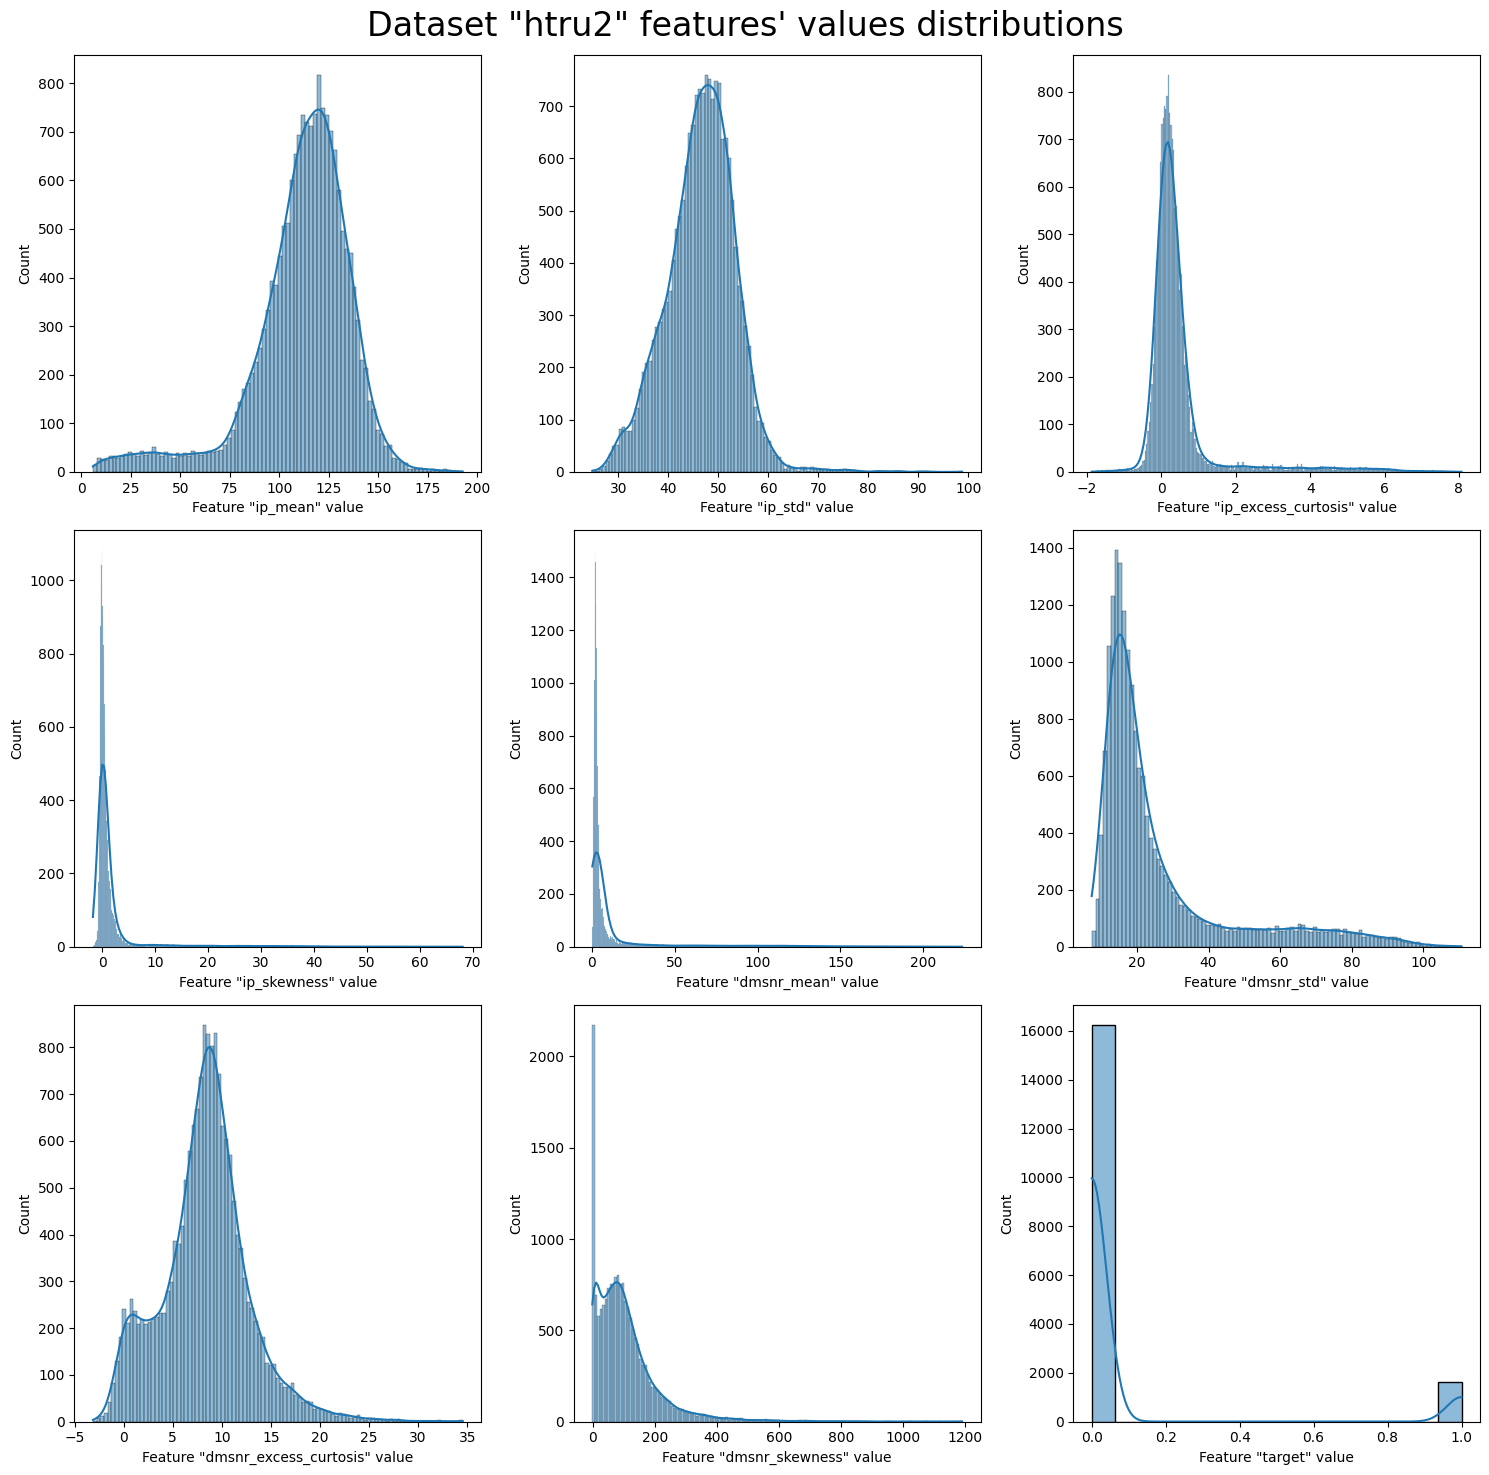

In [26]:
# Features analysis
df.name = "htru2"
analyse_dataset(df)

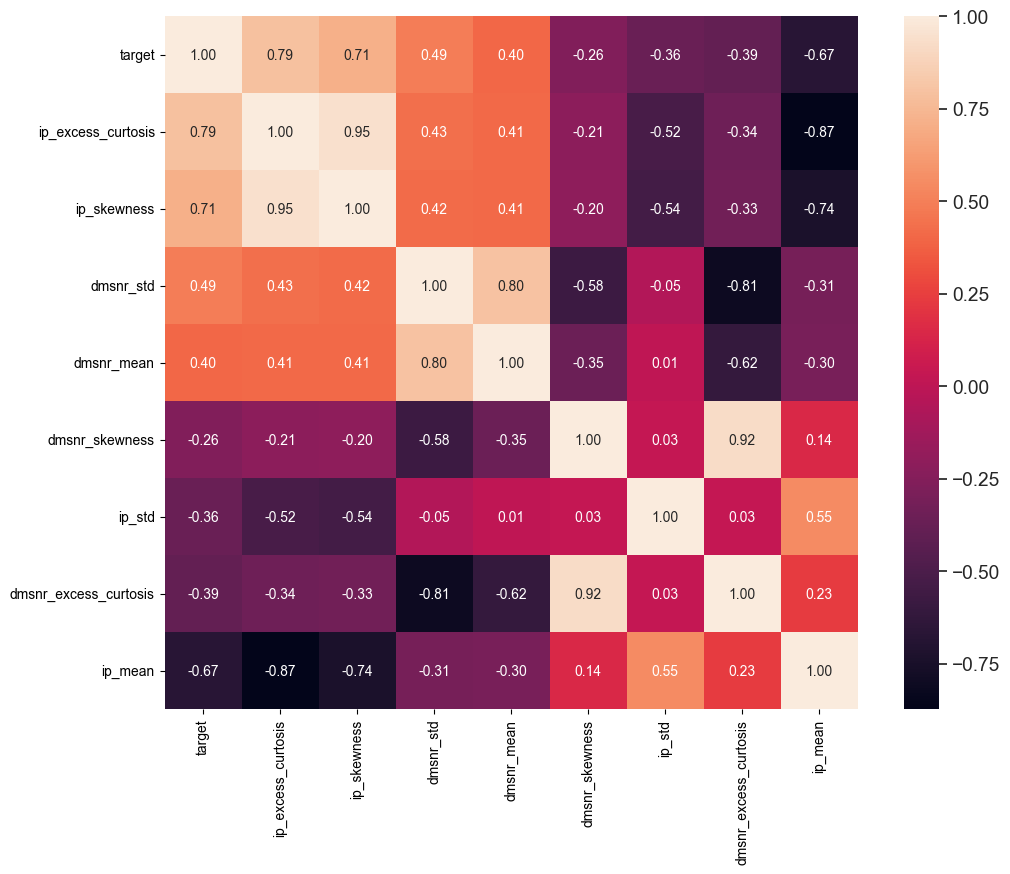

In [ ]:
# Features correlations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True)

k = len(df.columns) #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
# Features and target scatters
# In this - binary case it is not so usefull. It is better for regression
sns.pairplot(df, height = 2.5)
plt.show()

In [ ]:
# TODO:
# 1. Normality for features
# 2. Homoscedasticity

In [ ]:
# TODO: Applying best method